# Многоклассовая классификация

Пусть у нас есть задача классификации на $N$ классов.
Существует ряд стратегий, позволяющих построить многоклассовый классификатор на основе бинарных:
* Стратегия One-vs-All:
  * Для каждого $c \in \{1, 2, ..., N\}$ обучаем бинарных классификатор на всех объектах с метками $\mathbb{1}\left[y_n = c\right]$.
  * На предсказании присваиваем класс с наибольшим скором среди $N$ классификаторов.
* Стратегия One-vs-One:
  * Для каждых $i, j \in \{1, 2, ..., N\}, i \ne j$ учим классификатор на объектах, у которых $y \in {i, j}$
  * На предсказании присваиваем класс с наибольшим скором среди $\frac{N(N-1)}{2}$ классификаторов. 
* Коды, исправляющие ошибки $\left(\ast\right)$

  (а, б, в) -> (00, 01, 10)

  (1, ..., 100) -> $log_2(100)$-символов на число

  1 -> 0 0 0

  2 -> 0 0 1

  3 -> 0 1 0

  4 -> 0 1 1

  5 -> 1 0 0

  6 -> 1 0 1

Давайте попробуем посмотреть как работают линейные классификаторы на задаче многоклассовой классификации.

Для начала сгенерируем данные:

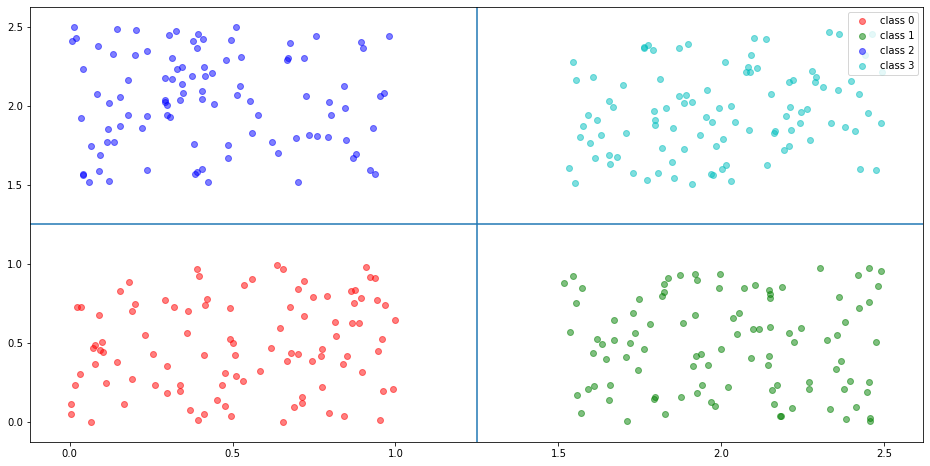

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
N = 100

X1 = np.random.rand(N, 2) + np.array([0, 0])
y1 = [0] * N
X2 = np.random.rand(N, 2) + np.array([1.5, 0])
y2 = [1] * N
X3 = np.random.rand(N, 2) + np.array([0, 1.5])
y3 = [2] * N
X4 = np.random.rand(N, 2) + np.array([1.5, 1.5])
y4 = [3] * N

plt.figure(figsize=(16, 8))
plt.scatter(X1[:, 0], X1[:, 1], c='r', alpha=0.5, label='class 0')
plt.scatter(X2[:, 0], X2[:, 1], c='g', alpha=0.5, label='class 1')
plt.scatter(X3[:, 0], X3[:, 1], c='b', alpha=0.5, label='class 2')
plt.scatter(X4[:, 0], X4[:, 1], c='c', alpha=0.5, label='class 3')
plt.axvline(1.25)
plt.axhline(1.25)
plt.legend(loc='upper right')
plt.show()

## One VS All
Давайте попробуем обучить SVM, применив стратегию "One VS All"

In [13]:
X = np.concatenate([X1, X2, X3, X4])
y = np.concatenate([y1, y2, y3, y4])

In [14]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score


base_model = SVC(kernel='linear', C=1.0)
classifier = OneVsRestClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=1.0000


In [15]:
def visualize_svm(model, ax, color, num):
    xlim = ax.xlim()
    ylim = ax.ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors=color, levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=2, facecolors='none', edgecolors=color)
    
    
def visualize_model(classifier):
    plt.figure(figsize=(16, 8))
    plt.scatter(X1[:, 0], X1[:, 1], c='r', alpha=0.5, label='Class 0')
    plt.scatter(X2[:, 0], X2[:, 1], c='g', alpha=0.5, label='Class 1')
    plt.scatter(X3[:, 0], X3[:, 1], c='b', alpha=0.5, label='Class 2')
    plt.scatter(X4[:, 0], X4[:, 1], c='c', alpha=0.5, label='Class 3')

    colors = ['r', 'g', 'b', 'c']
    for num, (color, est) in enumerate(zip(colors, classifier.estimators_)):
        visualize_svm(est, plt, color, num)
    
    plt.legend(loc='upper right')

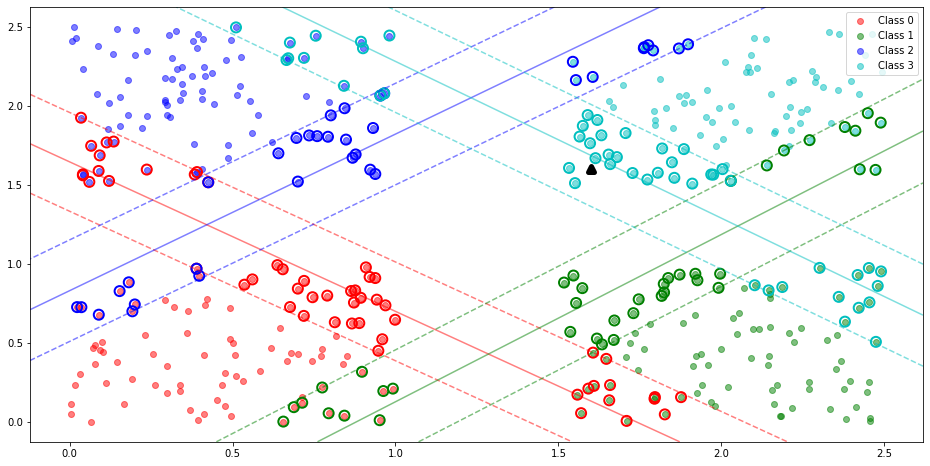

In [16]:
visualize_model(classifier)
plt.scatter([1.6], [1.6], color='black', linewidth=5, marker='^')

А почему Accuracy=1.0?

In [17]:
classifier.decision_function([[1.6, 1.6]])

array([[-4.69920884, -2.55041632, -2.53847626, -0.26464717]])

**Вопрос:** Всегда ли можно получить идеальное качество с помощью линейного SVM, если классы явным образом отделимы друг от друга прямыми?

Давайте посмотрим на линии SVM с нелинейным ядром:

### RBF

$k(x, x^{'}) = exp\left(-\frac{\|x - x^{'}\|^2}{2 \sigma^2}\right) = exp\left(-\gamma{\|x - x^{'}\|}^2\right)$

Accuracy=1.0000


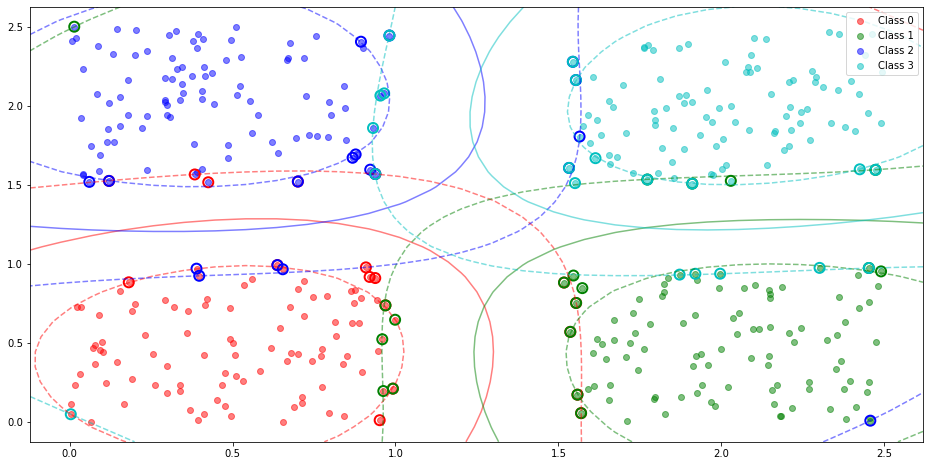

In [18]:
base_model = SVC(kernel='rbf', C=1.0)
classifier = OneVsRestClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

### Polynomial

$k(x, x^{'}) = {(\gamma\langle x, x^{'}\rangle + r)}^d$

Accuracy=1.0000


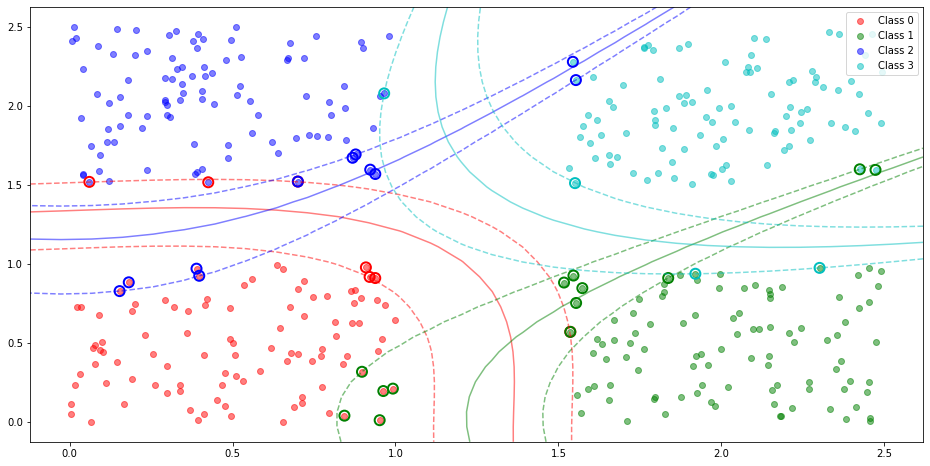

In [19]:
base_model = SVC(kernel='poly', C=1.0)
classifier = OneVsRestClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

Тут все понятно, ничего нового.

А давайте сгенерируем данные чуть поинтереснее:

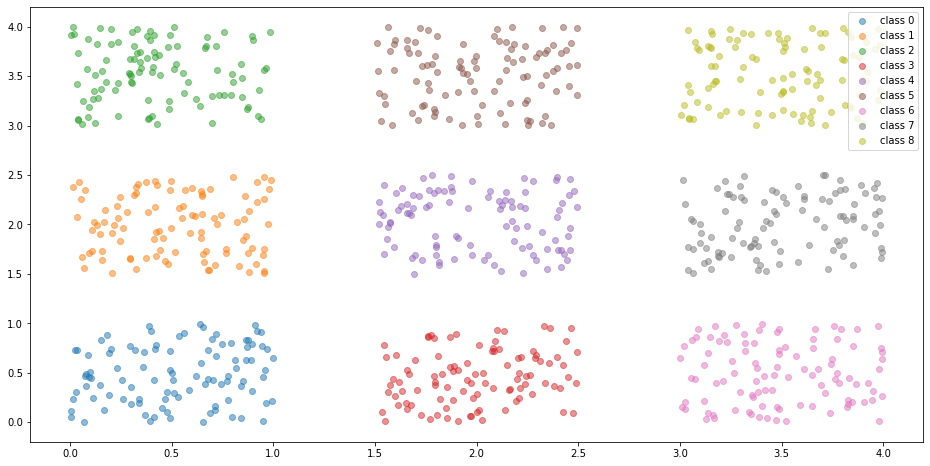

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.random.seed(666)
N = 100

num_cls = 0
Xs = []
Ys = []

for offset_x in [0, 1.5, 3]:
    for offset_y in [0, 1.5, 3]:
        X1 = np.random.rand(N, 2) + np.array([offset_x, offset_y])
        y1 = [num_cls] * N
        Xs.append(X1)
        Ys.append(y1)
        num_cls += 1

colors = list(mcolors.TABLEAU_COLORS.keys())
plt.figure(figsize=(16, 8))
for c in range(9):
    plt.scatter(Xs[c][:, 0], Xs[c][:, 1], c=colors[c], alpha=0.5, label=f'class {c}')
plt.legend(loc='upper right')
plt.show()

In [21]:
X = np.concatenate(Xs)
y = np.concatenate(Ys)

In [22]:
def visualize_svm(model, ax, color, num):
    xlim = ax.xlim()
    ylim = ax.ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5,
               linestyles=['-'], linewidths=3)

def visualize_model(classifier):
    plt.figure(figsize=(16, 8))
    colors = list(mcolors.TABLEAU_COLORS.keys())
    plt.figure(figsize=(16, 8))
    for c in range(9):
        plt.scatter(Xs[c][:, 0], Xs[c][:, 1], c=colors[c], alpha=0.5, label=f'class {c}')

    for num, (color, est) in enumerate(zip(colors, classifier.estimators_)):
        visualize_svm(est, plt, color, num)
    
    plt.legend(loc='upper right')

Попробуем One VS Rest:

Accuracy=0.4889


<ipython-input-22-fd239f034589>:11: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5,
<ipython-input-22-fd239f034589>:11: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5,
<ipython-input-22-fd239f034589>:11: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5,
<ipython-input-22-fd239f034589>:11: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5,
<ipython-input-22-fd239f034589>:11: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5,


<Figure size 1152x576 with 0 Axes>

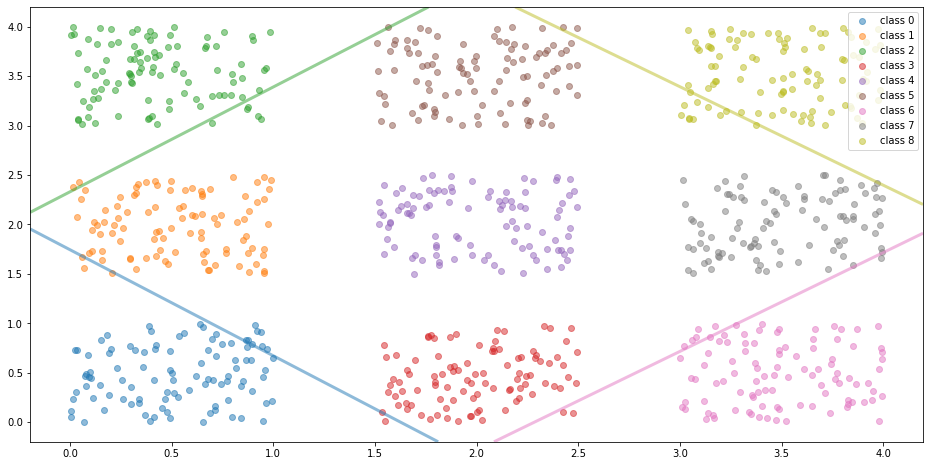

In [24]:
base_model = SVC(kernel='linear', C=1.0)
classifier = OneVsRestClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

Что произошло? Почему не построились разделяющие прямые?

Что делать, чтобы "заработало"?

Accuracy=1.0000


<Figure size 1152x576 with 0 Axes>

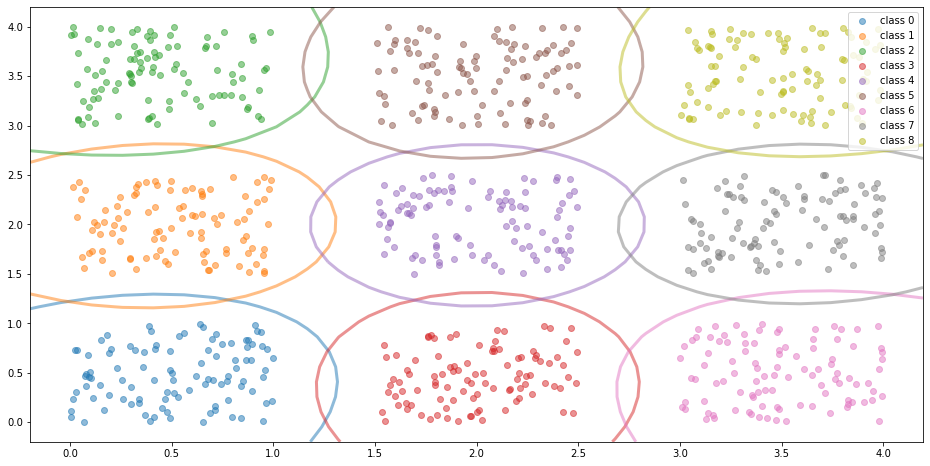

In [25]:
base_model = SVC(kernel='rbf', C=1.0)
classifier = OneVsRestClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

# One VS One

Давайте попробуем обучить SVM, применив стратегию "One VS One"

In [26]:
def visualize_svm(model, ax, color, num):
    xlim = ax.xlim()
    ylim = ax.ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.2,
               linestyles=['-'], linewidths=1)
#     ax.contour(XX+0.01, YY+0.01, Z, colors=color[0], levels=[0], alpha=0.5,
#                linestyles=['-'], linewidths=3)

def visualize_model(classifier):
    plt.figure(figsize=(16, 8))
    colors = list(mcolors.TABLEAU_COLORS.keys())
    plt.figure(figsize=(16, 8))
    for c in range(9):
        plt.scatter(Xs[c][:, 0], Xs[c][:, 1], c=colors[c], alpha=0.5, label=f'class {c}')
    
    colors = ([colors[0]] * 8 + [colors[1]] * 7 + [colors[2]] * 6 +
              [colors[3]] * 5 + [colors[4]] * 4 + [colors[5]] * 3 + 
              [colors[6]] * 2 + [colors[7]])
    for num, (color, est) in enumerate(zip(colors, classifier.estimators_)):
        visualize_svm(est, plt, color, num)
    
    plt.legend(loc='upper right')

Accuracy=1.0000


<Figure size 1152x576 with 0 Axes>

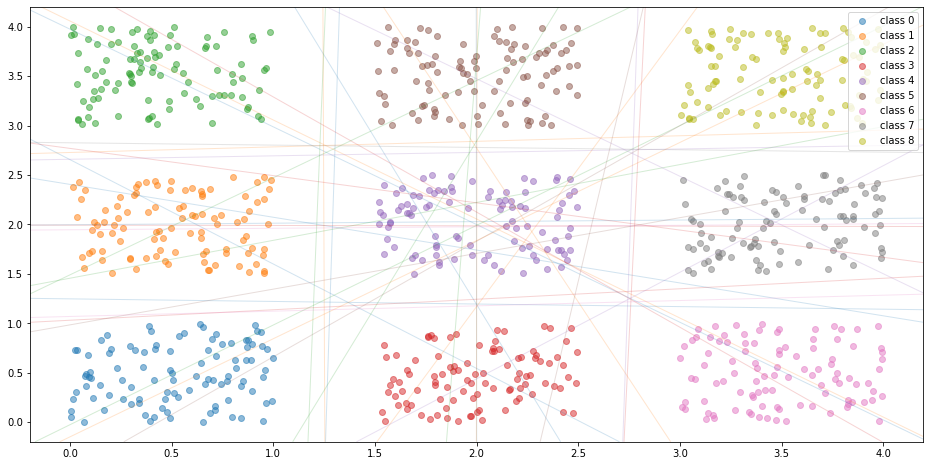

In [27]:
from sklearn.multiclass import OneVsOneClassifier

base_model = SVC(kernel='linear', C=1.0)
classifier = OneVsOneClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

Accuracy=1.0000


<Figure size 1152x576 with 0 Axes>

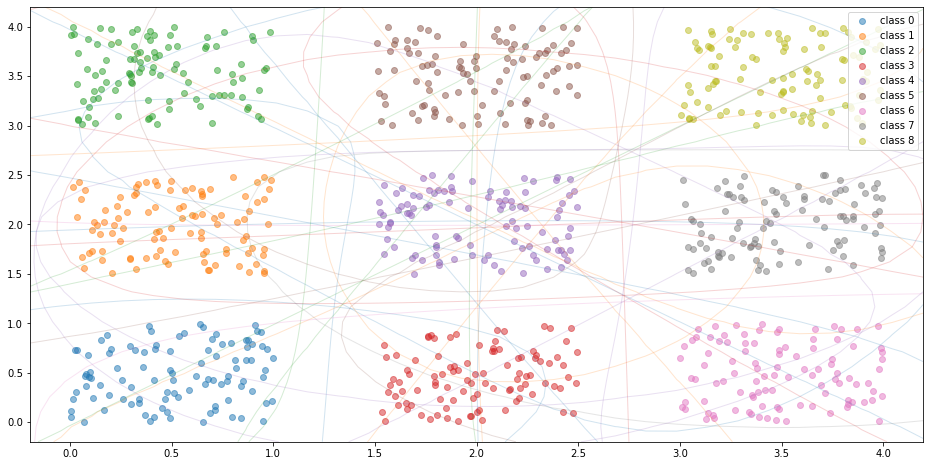

In [28]:
base_model = SVC(kernel='rbf', C=1.0)
classifier = OneVsOneClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

Accuracy=1.0000


<Figure size 1152x576 with 0 Axes>

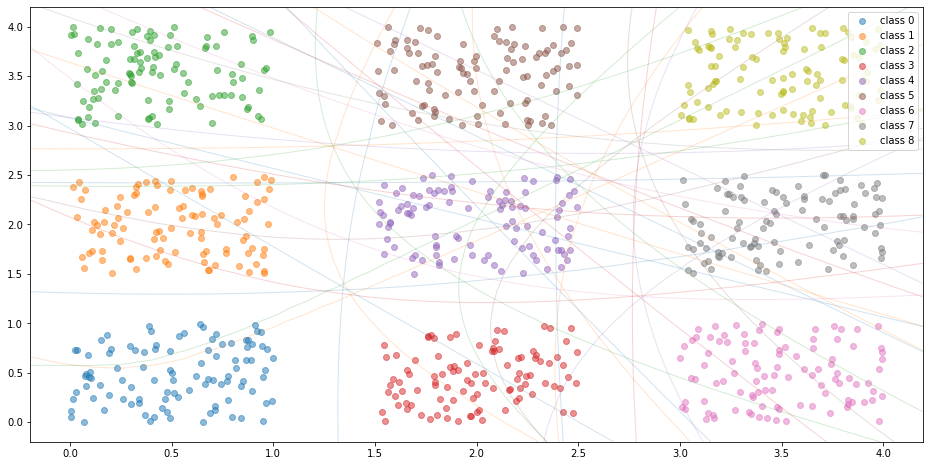

In [29]:
base_model = SVC(kernel='poly', C=1.0)
classifier = OneVsOneClassifier(base_model, n_jobs=4)
classifier.fit(X, y)
pred = classifier.predict(X)
acc = accuracy_score(y, pred)
print(f"Accuracy={acc:.4f}")
visualize_model(classifier)

**Вопрос:** Может ли One VS One работать хуже чем One VS All? Опишите такой кейс, если он существует.

### Output Error Codes

Давайте посмотрим, как работают коды, исправляющие ошибки.

In [30]:
from sklearn.multiclass import OutputCodeClassifier

for kernel in ["linear", "rbf", "poly"]:
    base_model = SVC(kernel=kernel, C=1.0)
    classifier = OutputCodeClassifier(base_model, n_jobs=4)
    classifier.fit(X, y)
    pred = classifier.predict(X)
    acc = accuracy_score(y, pred)
    print(f"{kernel}, Accuracy={acc:.4f}")

linear, Accuracy=0.5022
rbf, Accuracy=1.0000
poly, Accuracy=0.7356


In [31]:
from sklearn.multiclass import OutputCodeClassifier

for kernel in ["linear", "rbf", "poly"]:
    acc = []
    for _ in range(20):
        base_model = SVC(kernel=kernel, C=1.0)
        classifier = OutputCodeClassifier(base_model, n_jobs=4)
        classifier.fit(X, y)
        pred = classifier.predict(X)
        acc.append(accuracy_score(y, pred))
    acc = np.array(acc)
    print(f"{kernel}, mean Accuracy={acc.mean():.4f}, std Accuracy={acc.std():.4f}")

linear, mean Accuracy=0.4564, std Accuracy=0.1107
rbf, mean Accuracy=0.9999, std Accuracy=0.0002
poly, mean Accuracy=0.7461, std Accuracy=0.0748


**Данный метод серьезно зависит от сида и от значения code_size!**

## Когда применять данные стратегии

Из sklearn:
```An estimator object implementing fit and one of decision_function or predict_proba.```

Что это значит?

In [32]:
from sklearn.linear_model import LogisticRegression


wrappers = [OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier]

for wrapper in wrappers:
    classifier = wrapper(LogisticRegression())
    classifier.fit(X, y)
    pred = classifier.predict(X)
    acc = accuracy_score(y, pred)
    print(f"{wrapper.__name__}, accuracy={acc:.4f}")

OneVsOneClassifier, accuracy=1.0000
OneVsRestClassifier, accuracy=0.9900
OutputCodeClassifier, accuracy=0.4456


In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

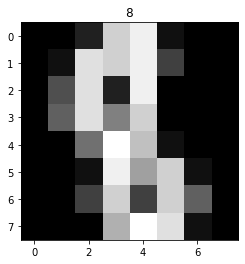

In [35]:
idx = np.random.randint(0, 1797)
plt.imshow(X[idx].reshape(8, 8), cmap='gray')
plt.title(f"{y[idx]}")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [48]:
classifier = SVC(C=1.0)

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9611


In [46]:
classifier = LogisticRegression(max_iter=10000)

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9333


In [51]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

[50, 100] -> [0, 1]

$f(x) = \frac{x - 50}{100 - 50}$

$x \in [50, 100]$, тогда $f(x) \in [0, 1]$

In [53]:
classifier = LogisticRegression(max_iter=10000)

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9333


In [54]:
classifier = LogisticRegression(max_iter=10000)

classifier.fit(X_train_scaled, y_train)
pred = classifier.predict(X_test_scaled)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9366


In [55]:
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler()
ss_scaler.fit(X_train)
X_train_scaled = ss_scaler.transform(X_train)
X_test_scaled = ss_scaler.transform(X_test)

In [56]:
classifier = LogisticRegression(max_iter=10000)

classifier.fit(X_train_scaled, y_train)
pred = classifier.predict(X_test_scaled)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9388


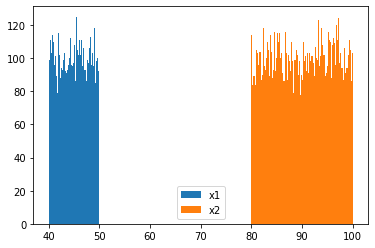

In [57]:
x1 = np.random.rand(10000) * 10 + 40
x2 = np.random.rand(10000) * 20 + 80
plt.hist(x1, bins=100, label="x1")
plt.hist(x2, bins=100, label="x2")
plt.legend()
plt.show()

Настраиваем параметры дальше:

In [58]:
classifier = SVC(C=1.0, gamma=0.001)

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9689


Что за $\gamma$ ?
 * polynomial: ${\left(\gamma\langle x, x^{'}\rangle + r\right)}^d$
 * rbf: $exp\left(-\gamma{||x - x^{'}||}^2\right)$

In [59]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [68]:
classifier = SVC(C=1.0, gamma=0.001)

classifier.fit(X_train_scaled, y_train)
pred = classifier.predict(X_test_scaled)
acc = accuracy_score(y_test, pred)
print(f"Accuracy={acc:.4f}")

Accuracy=0.9544


# Простейшая нейронная сеть

$\overline{f}(x) = f_n(f_{n-1}(f_{n-2}(...), \lambda_{n-2}), \lambda_{n-1}), \lambda_n)$

Можно сказать, что задача машинного обучения состоит в построении приближения функции $f(x) : \mathbb{X} \rightarrow \mathbb{Y}$, где $\mathbb{X}$ - пространство признаков, $\mathbb{Y}$ - пространство ответов.

Будем строить приближение $\overline{f}(x): \mathbb{X} \rightarrow \mathbb{Y}$ как каскад функций: 

$$
\begin{cases}
    \overline{f}(x) &= f_n(O_{n-1}, \lambda_n) \\
    O_{n-1} &= f_{n-1}(O_{n-2}, \lambda_{n-1}) \\
    & ... \\
    O_2 &= f_2(O_1, \lambda_2) \\
    O_1 &= f_1(x, \lambda_1) \\
\end{cases}
$$

Таким образом, получаем функцию: $\overline{f}(x; \Lambda)$, где $\Lambda = (\lambda_1, ..., \lambda_n), \lambda_i$ - это некоторая (многомерная) переменная.

Также зададимся некоторой функцией потерь $\mathcal{L}(f(x), \overline{f}(x; \Lambda))$, минимизация которой приведет нас к искомому результату. 

Тогда градиентный спуск: $\Lambda^{(n)} = \Lambda^{(n-1)} - \alpha \nabla_{\Lambda}\mathcal{L}$.

Заметим, что $\nabla_{\Lambda}\mathcal{L} = \frac{d\mathcal{L}}{d\overline{f}}\frac{d\overline{f}}{d\Lambda}$.

$\mathcal{L}(x,y)$

$\overline{f}(x) = f_n(f_{n-1}(O_{n-2}; \lambda_{n-1}), \lambda_n)$

Попробуем вычислить производные $\overline{f}(x)$ по $\lambda_{i}$:
$$
\begin{cases}
\nabla_{\lambda_n}\overline{f} &= \frac{d\overline{f}}{d\lambda_n} = \frac{df_n}{d\lambda_n} \text{, } &\nabla_{O_{n-1}}\overline{f} = \frac{d\overline{f}(x)}{dO_{n-1}} = \frac{df_n}{dO_{n-1}} \\
\\
\nabla_{\lambda_{n-1}}\overline{f} &= \frac{d\overline{f}}{dO_{n-1}}\frac{df_{n-1}}{d\lambda_{n-1}} = \nabla_{O_{n-1}}\overline{f}*\frac{df_{n-1}}{d\lambda_{n-1}} \text{, } &\nabla_{O_{n-2}}\overline{f} = \frac{df_n}{dO_{n-1}}\frac{df_{n-1}}{dO_{n-2}} = \nabla_{O_{n-1}}\overline{f}*\frac{df_{n-1}}{dO_{n-2}} \\
\\
\nabla_{\lambda_{n-2}}\overline{f} &= \frac{d\overline{f}}{dO_{n-1}}\frac{df_{n-1}}{dO_{n-2}}\frac{df_{n-2}}{d\lambda_{n-2}} = \nabla_{O_{n-2}}\overline{f}*\frac{df_{n-2}}{d\lambda_{n-2}} \text{, } &\nabla_{O_{n-3}}\overline{f} = \frac{df_n}{dO_{n-1}}\frac{df_{n-1}}{dO_{n-2}}\frac{df_{n-2}}{dO_{n-3}} = \nabla_{O_{n-2}}\overline{f}*\frac{df_{n-2}}{dO_{n-3}} \\
\\
& ... & ... \\
\\
\nabla_{\lambda_{1}}\overline{f} &= \nabla_{O_{1}}\overline{f} * \frac{df_{1}}{d\lambda_{1}} \text{, } &\nabla_{x}\overline{f} = \nabla_{O_1} \overline{f}*\frac{df_{1}}{dx} \\
\end{cases}
$$


Рассмотрим производную по $\lambda_{n-i}$:
$$
\begin{cases}
\nabla_{O_{n-i}}\overline{f}(x) &= \nabla_{O_{n-i+1}}\overline{f}(x)*\frac{df_{n-i+1}}{dO_{n-i}} \left(O_{n-i}, \lambda_{n-i+1}\right) \\
\nabla_{\lambda_{n-i}}\overline{f}(x) &= \nabla_{O_{n-i}}\overline{f}(x)*\frac{df_{n-i}}{d\lambda_{n-i}} \left(O_{n-i-1}, \lambda_{n-i}\right) \\
\end{cases}
$$


Соответсвенно, для подсчета градиента по каждой $\lambda_{n-i}$ по входу $x$ нам нужны:
1. Для каждой $f_i$ знать выражение градиента по входу ($O_{i-1}$) и параметрам ($\lambda_i$);
2. Для каждой $f_i$ знать значение функции на заданном входе $x$.

Таким образом, нам необходимо два прохода - "вперед" и "назад":
1. Проход "вперед" - вычислить все $O_i$;
2. Проход "назад" - вычислить все $\nabla_{\lambda_i}\overline{f}(x)$ и $\nabla_{O_{i-1}}\overline{f}(x)$.

### Линейный классификатор

Рассмотрим задачу, где $\mathbb{X} = \mathbb{R}^n$, а $\mathbb{Y} = \left\{\textbf{y} = (y_1, ..., y_C): \sum_i y_i = 1, y_i \in [0, 1]\right\}$.

Будем строить отображение $\overline{f}(X) = SoftMax\left(NonLinear\left(Linear\left(X\right)\right)\right)$, где:
* $Linear(X; W, b) = XW + b$;
* $NonLinear(z)$ - можем взять одну из:
  * $\sigma(z) = \frac{1}{1 + exp(-z)}$;
  * $ReLU(z) = max(0, z)$;
* $SoftMax(x) = {\left(\frac{exp(x_i)}{\sum_j exp(x_j)}\right)}_{i=1}^n$, где $x = (x_1, ..., x_n)$ - некоторый входной вектор. 

Минимизировать будем следующую функцию потерь: $CrossEntropy(y, p) = -\sum_i y_i log(p_i)$.

Заметим, что в данном случае параметры есть только у линейного слоя $Linear(X)$.

Посчитаем необходимые градиенты:
$$
\begin{cases}
& \nabla_{p} CrossEntropy(p, y) &= {\left(-\frac{y_i}{p_i}\right)}_{i=1}^n \\
& \nabla_{x} SoftMax(x) &= {\left(\frac{exp(x_i) \sum_j exp(x_j) - exp(x_i) * exp(x_i)}{{\left(\sum_j exp(x_j)\right)}^2}\right)}_{i=1}^n \\
& \nabla_{z} \sigma(z) & = \sigma(z) (1 - \sigma(z)) \\
& \nabla_{z} ReLU(z)   & = \mathbb{I}[z > 0] \\ 
& \nabla_{W} Linear(X) & = X \\
& \nabla_{b} Linear(X) & = \mathbb{1} \\
& \nabla_{X} Linear(X) & = W^T \\
\end{cases}
$$


$$
\frac{d}{dw_{ij}}(Linear(X)) - ? \\
Linear(X) = Z \\
W = (w_{ij}) \\
\frac{d}{dx_{ij}}(Z) = \frac{dz_{kl}}{dx_{ij}} \\
z_{kl} = \sum_p x_{kp} * w_{pl} + const \\
\frac{dz_{kl}}{dx_{ij}} = w_{jl}, \text{ при k = i, 0 иначе}  \\ 
\frac{dZ}{dW} = W^T
$$

In [1]:
import numpy as np

def sigma(x):
    return 1 / (1 + np.exp(-x))

def softmax(X):
    mean_x = np.mean(X, axis=1)
    e = np.exp((X.T - mean).T)
    s = np.sum(e, axis=1, keepdims=True)
    return e / s


class Linear:
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self._input = None
        self.W = np.random.uniform(0, 1, size=(input_shape, output_shape))
        self.b = np.random.uniform(0, 1, size=(input_shape, output_shape))
        
    def forward(self, X):
        self._input = X.copy()
        out = X * self.W + b
        return out
    
    def backward(self, dZ):
        #dX = ...
        #dW = ...
        #db = ...
        return [dW, db], dX
    
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        pass
    
    def backward(self, ...):
        pass
        # return [], dX
    

class ReLU:
    def __init__(self):
        pass
        
    def forward(self, X):
        pass
    
    def backward(self, ...):
        pass
    

def SoftMax:
    def __init__(self):
        pass
        
    def forward(self, x):
        pass
    
    def backward(self, ...):
        pass
        
        
def ComposerModel:
    def __init__(self):
        pass
    
    def forward(self, X):
        pass
    
    def backward(self, ...)
    

    
def CrossEntropy:
    def __init__(self):
        pass
        
    def forward(self, x, y):
        pass
    
    def backward(self):
        pass

# Практика

Приступим к практике.

Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация).

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data["target"]
data.drop(columns="target", inplace=True)
data.sample(3)